In [1]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = \
    imdb.load_data(num_words=500)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Joshua Jinseok Kim\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,) (25000,)
(25000,) (25000,)


C:\Users\Joshua Jinseok Kim\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
print('Number of Tokens in 0th Sample:', len(train_input[0]))
print('Number of Tokens in 1st Sample:', len(train_input[1]))
print('Number of Tokens in 2nd Sample:', len(train_input[2]))
print('...')

Number of Tokens in 0th Sample: 218
Number of Tokens in 1st Sample: 189
Number of Tokens in 2nd Sample: 141
...


In [3]:
print('All the Tokens in 0th Sample:')
print(train_input[0])

All the Tokens in 0th Sample:
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [4]:
print('Target Value of the First 20 Samples:')
print(train_target[:20])

Target Value of the First 20 Samples:
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [5]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, random_state=1234)

print(train_input.shape, train_target.shape)
print(val_input.shape, val_target.shape)
print(test_input.shape, test_target.shape)

(20000,) (20000,)
(5000,) (5000,)
(25000,) (25000,)


In [6]:
import numpy as np
import pandas as pd

length_list = [len(sample) for sample in train_input]

print('Mean Length:', np.mean(length_list))
print('Median Length:', np.median(length_list))

Mean Length: 238.42155
Median Length: 178.0


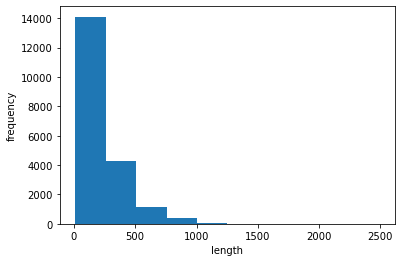

''

In [7]:
import matplotlib.pyplot as plt

plt.hist(length_list)

plt.xlabel('length')
plt.ylabel('frequency')

plt.show()
;

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

print(train_seq.shape)
print(val_seq.shape)

(20000, 100)
(5000, 100)


In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(8, input_shape=(100, 500)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.utils import to_categorical

train_oh = to_categorical(train_seq)
val_oh = to_categorical(val_seq)

print(train_oh.shape)
print(val_oh.shape)

(20000, 100, 500)
(5000, 100, 500)


In [11]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

rmsprop = RMSprop(lr=1e-4)

model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

checkpoint_cb = ModelCheckpoint('data/best-model.h5')
earlystopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_oh,
    train_target,
    epochs=50,
    batch_size=64,
    validation_data=(val_oh, val_target),
    callbacks=[checkpoint_cb, earlystopping_cb]
)

Epoch 1/50
313/313 [==============================] - 23s 53ms/step - loss: 0.7023 - accuracy: 0.5054 - val_loss: 0.7024 - val_accuracy: 0.4942
Epoch 2/50
313/313 [==============================] - 12s 37ms/step - loss: 0.6960 - accuracy: 0.5103 - val_loss: 0.6995 - val_accuracy: 0.4954
Epoch 3/50
313/313 [==============================] - 13s 40ms/step - loss: 0.6935 - accuracy: 0.5225 - val_loss: 0.6975 - val_accuracy: 0.4982
Epoch 4/50
313/313 [==============================] - 12s 38ms/step - loss: 0.6903 - accuracy: 0.5336 - val_loss: 0.6959 - val_accuracy: 0.5022
Epoch 5/50
313/313 [==============================] - 14s 46ms/step - loss: 0.6904 - accuracy: 0.5242 - val_loss: 0.6945 - val_accuracy: 0.5048
Epoch 6/50
313/313 [==============================] - 12s 37ms/step - loss: 0.6864 - accuracy: 0.5409 - val_loss: 0.6932 - val_accuracy: 0.5054
Epoch 7/50
313/313 [==============================] - 11s 36ms/step - loss: 0.6848 - accuracy: 0.5444 - val_loss: 0.6918 - val_accuracy:

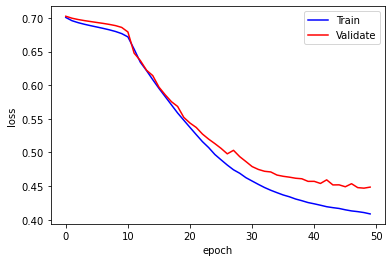

''

In [12]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_list = range(len(train_loss))

plt.plot(epoch_list, train_loss, 'b', label='Train')
plt.plot(epoch_list, val_loss, 'r', label='Validate')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()
;

In [13]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


In [14]:
from tensorflow.keras.layers import Embedding

model = Sequential()
model.add(Embedding(500, 16, input_length=100))
model.add(SimpleRNN(8))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [15]:
rmsprop = RMSprop(lr=1e-4)

model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

checkpoint_cb = ModelCheckpoint('data/best-embedding-model.h5')
earlystopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

In [16]:
history = model.fit(
    train_seq,
    train_target,
    epochs=50,
    batch_size=64,
    validation_data=(val_seq, val_target),
    callbacks=[checkpoint_cb, earlystopping_cb]
)

Epoch 1/50
313/313 [==============================] - 8s 13ms/step - loss: 0.6999 - accuracy: 0.4955 - val_loss: 0.6818 - val_accuracy: 0.5666
Epoch 2/50
313/313 [==============================] - 4s 12ms/step - loss: 0.6731 - accuracy: 0.6048 - val_loss: 0.6491 - val_accuracy: 0.6746
Epoch 3/50
313/313 [==============================] - 4s 12ms/step - loss: 0.6391 - accuracy: 0.6954 - val_loss: 0.6201 - val_accuracy: 0.7154
Epoch 4/50
313/313 [==============================] - 4s 12ms/step - loss: 0.6096 - accuracy: 0.7288 - val_loss: 0.5912 - val_accuracy: 0.7422
Epoch 5/50
313/313 [==============================] - 4s 13ms/step - loss: 0.5788 - accuracy: 0.7479 - val_loss: 0.5636 - val_accuracy: 0.7548
Epoch 6/50
313/313 [==============================] - 4s 13ms/step - loss: 0.5512 - accuracy: 0.7617 - val_loss: 0.5403 - val_accuracy: 0.7618
Epoch 7/50
313/313 [==============================] - 4s 13ms/step - loss: 0.5225 - accuracy: 0.7734 - val_loss: 0.5233 - val_accuracy: 0.7576

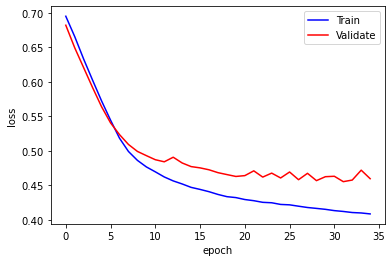

''

In [17]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_list = range(len(train_loss))

plt.plot(epoch_list, train_loss, 'b', label='Train')
plt.plot(epoch_list, val_loss, 'r', label='Validate')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()
;